## Word 2 Vec

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename="C:/Users/Madhu/Desktop/"
data = pd.read_csv(filename+'sentences.csv')

In [2]:
data.head()

,SentenceId,EpisodeId,Season,Episode,Sentence
0,1,1,1,1,Pilot
1,2,1,1,1,Scene One
2,3,1,1,1,[Title: The Year 2030]
3,4,1,1,1,"Narrator: Kids, I'm going to tell you an incre..."
4,5,1,1,1,Son: Are we being punished for something?


In [3]:
df= data.loc[data['Season']==1]
df=df.fillna("(")

In [4]:
df['Character']=""
for sen,id in zip(df["Sentence"],df["SentenceId"]):
    
    if "[" is sen[0] or "(" is sen[0] or "Scene" in sen[0:5] or ":" not in sen:
        df = df.drop(df[df['Sentence']==sen].index)
        
    else:
        value=""
        for c in sen:
            if c==":":
                df.set_value(id-1, 'Sentence', sen[len(value)+1:])
                break
                
            else:
                value+=c
                
        
        if "(" in value:
            index=value.index("(")
            value=value[:index-1]
            
        value=value.lower()    
        #df.loc[df['Sentence'] == sen,'Character']=sen #setting the values
        df.set_value(id-1, 'Character', value)

#re arrange the order 
df = df[['SentenceId','EpisodeId','Season','Episode','Character','Sentence']]

In [5]:
df[:5]

,SentenceId,EpisodeId,Season,Episode,Character,Sentence
3,4,1,1,1,narrator,"Kids, I'm going to tell you an incredible sto..."
4,5,1,1,1,son,Are we being punished for something?
5,6,1,1,1,narrator,No
6,7,1,1,1,daughter,"Yeah, is this going to take a while?"
7,8,1,1,1,narrator,Yes. (Kids are annoyed) Twenty-five years ago...


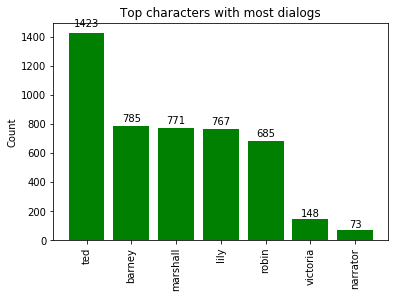

In [6]:
# for labeling in plotting
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

topchar=df.Character.value_counts()[:7]
labels=np.array(topchar.keys())
values=np.array(topchar)
ind=np.arange(len(labels))

fig,ax=plt.subplots()
rects=ax.bar(ind,values,color='g')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_ylabel("Count")
ax.set_title("Top characters with most dialogs")
autolabel(rects)
plt.show()

In [7]:
import os
import pandas as pd
import nltk
import gensim


C:\Users\Madhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using Theano backend.


In [8]:
corpus= df['Sentence'].values.tolist()
tok_corp= [nltk.word_tokenize(sent) for sent in corpus]

In [9]:
       
model = gensim.models.Word2Vec(tok_corp, min_count=1, size = 32)
#model.save('testmodel')
#model = gensim.models.Word2Vec.load('test_model')


In [10]:
model.most_similar('your')

[('in', 0.9998530149459839),
 ('at', 0.9998486042022705),
 ('My', 0.9998321533203125),
 ('from', 0.9998310804367065),
 ('The', 0.9998186826705933),
 ('my', 0.9998072385787964),
 ('his', 0.9998066425323486),
 ('for', 0.9997963905334473),
 ('He', 0.9997928142547607),
 ('with', 0.9997889995574951)]